### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Transformation

- Creating new features from existing features
- Trimming Columns
- Handling ordinal and nominal categorical features
- Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
%%time
df = pd.read_hdf('../data/interim/Info_UserData_Info_Content.h5', key='user')

Wall time: 688 ms


In [57]:
df.head()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,points,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc
0,12,7.0,89.800000,1.600000,0.500000,3.0,0.0,1.0,1,9533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,0.0,74.250000,1.500000,3.250000,4.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,1.0,24.571429,1.428571,3.142857,6.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,8,3.0,37.750000,1.125000,1.875000,5.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26,15.0,14.923077,1.500000,0.423077,11.0,0.0,1.0,1,73838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df.describe()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,points,...,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc
count,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,4.825620e+05,...,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000,482562.000000
mean,9.050835,6.190369,46.634834,1.570022,0.513399,2.476140,0.008049,0.867078,0.936296,2.214330e+05,...,0.034756,0.136227,0.003850,0.034661,0.124276,0.041874,0.134466,0.026453,0.139089,0.034582
std,9.227107,5.899643,58.739064,1.385786,0.702969,4.809446,0.107540,0.979077,1.089943,2.676615e+05,...,0.183162,0.343030,0.061931,0.182919,0.329897,0.200302,0.341152,0.160477,0.346040,0.182719
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.344200e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,5.000000,30.533333,1.214286,0.272727,1.000000,0.000000,1.000000,1.000000,1.383930e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,7.000000,55.400000,1.666667,0.750000,3.000000,0.000000,1.000000,1.000000,2.837680e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,625.000000,377.000000,1800.000000,189.000000,13.000000,226.000000,8.000000,11.000000,4.000000,2.476118e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df.columns

Index(['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt',
       'used_hint_cnt', 'is_hint_used', 'is_downgrade', 'is_upgrade', 'level',
       'points', 'badges_cnt', 'user_grade', 'has_teacher_cnt',
       'is_self_coach', 'has_student_cnt', 'belongs_to_class_cnt',
       'has_class_cnt', 'date_count', 'difficulty', 'learning_stage',
       'user_city_chc', 'user_city_cy', 'user_city_hc', 'user_city_hlc',
       'user_city_ilc', 'user_city_kh', 'user_city_kl', 'user_city_km',
       'user_city_lj', 'user_city_ml', 'user_city_ntct', 'user_city_ntpc',
       'user_city_phc', 'user_city_ptc', 'user_city_tc', 'user_city_tn',
       'user_city_tp', 'user_city_ttct', 'user_city_ty', 'user_city_ylc'],
      dtype='object')

## Splitting Train Set and Test Set

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('level', axis=1)
y = df['level']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Test

In [62]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38066     0     0     1     0]
 [    1 42470    91    28    16]
 [   23   699  4855   248   148]
 [   16   301   624  1852   639]
 [   12   162   387   536  5338]]


0.9592593743847979

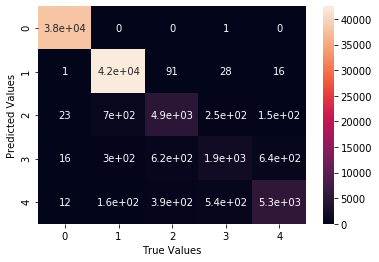

In [65]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
ax.set(xlabel='True Values', ylabel='Predicted Values')
plt.show()

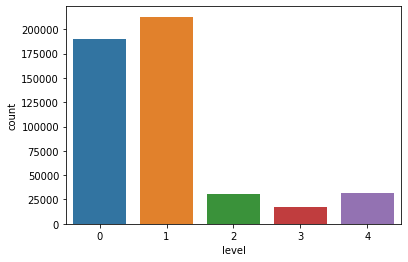

In [66]:
df = pd.DataFrame(X).copy()
df['level'] = y
sns.countplot('level', data=df)

In [67]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X, y = rus.fit_sample(X, y)

#plot_2d_space(X_rus, y_rus, 'Random under-sampling')

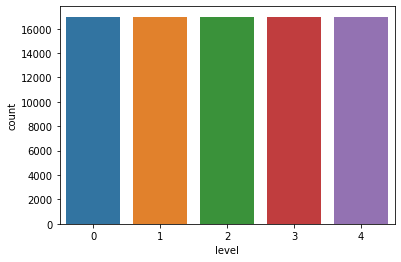

In [68]:
df = pd.DataFrame(X).copy()
df['level'] = y
sns.countplot('level', data=df)

In [69]:
df

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,points,badges_cnt,...,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty,user_city_ylc,level
0,6,2.0,14.000000,4.166667,1.500000,4.0,0.0,0.0,162917,33,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,4,1.0,14.500000,2.250000,1.250000,3.0,0.0,0.0,144756,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,3.0,11.666667,1.000000,0.000000,0.0,0.0,0.0,37739,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,18,2.0,21.500000,1.000000,0.000000,0.0,0.0,0.0,298700,46,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,5.0,23.166667,1.166667,0.166667,1.0,0.0,0.0,25464,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84915,12,11.0,8.166667,1.166667,0.166667,1.0,0.0,3.0,917636,24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
84916,17,15.0,10.937500,1.125000,0.125000,1.0,0.0,3.0,728437,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
84917,9,7.0,62.714286,1.000000,0.000000,0.0,0.0,2.0,454579,55,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
84918,24,19.0,12.500000,2.041667,0.541667,5.0,0.0,3.0,367275,65,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [70]:
train_features, test_features, train_labels, test_labels=train_test_split(
    df.drop(labels=['level'], axis=1),
    df['level'],
    test_size=0.2,
    random_state=41)

In [71]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)

In [72]:
constant_filter.fit(train_features)

VarianceThreshold(threshold=0)

In [73]:
len(train_features.columns[constant_filter.get_support()])

39

In [74]:
constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [75]:
for column in constant_columns:
    print(column)

### Correlation with the Target

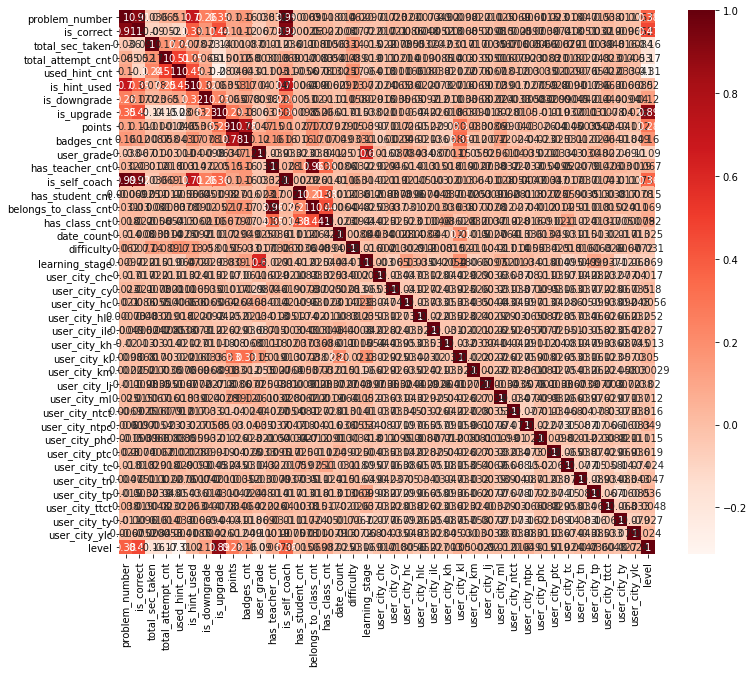

In [76]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
#Correlation with output variable
cor_target = abs(cor["level"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

is_upgrade    0.891815
level         1.000000
Name: level, dtype: float64

In [78]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df.drop(labels=['level'], axis=1),
    df['level'],
    test_size=0.2,
    random_state=41)

In [79]:
correlated_features = set()
correlation_matrix = df.corr()

In [80]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [81]:
len(correlated_features)

4

In [82]:
print(correlated_features)

{'belongs_to_class_cnt', 'is_self_coach', 'level', 'is_correct'}


In [83]:
X = df.drop(correlated_features, axis=1)
y = df['level']

## Wrapper Method

In [84]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['problem_number', 'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_upgrade', 'points', 'badges_cnt']
[2.10481260e-01 4.57610283e-02 4.28044949e-02 5.06880760e-02
 2.79745375e-02 5.29606743e-03 4.03269577e-01 5.36047856e-02
 4.03931975e-02 2.02494557e-02 1.45309462e-02 3.00705999e-03
 4.79537070e-03 1.67720167e-02 9.12550566e-03 5.15469385e-03
 2.28069345e-03 2.06233882e-03 2.80658541e-03 1.38816588e-03
 1.23488866e-03 2.51361935e-03 1.33155007e-03 1.27180366e-03
 1.38131662e-05 1.81429761e-03 1.93371901e-03 4.69095926e-03
 2.06270000e-04 1.94230758e-03 4.29686092e-03 2.98983100e-03
 4.93576899e-03 1.50160018e-03 4.67558526e-03 2.20126846e-03]


In [85]:
X = df[features]
y = df['level']

In [32]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

C:\Users\likwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\likwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.5884 ± 0.0041,is_upgrade
0.3745 ± 0.0031,problem_number
0.1002 ± 0.0014,total_attempt_cnt
0.0999 ± 0.0006,is_hint_used
0.0966 ± 0.0011,points
0.0896 ± 0.0018,used_hint_cnt
0.0752 ± 0.0007,total_sec_taken
0.0748 ± 0.0011,badges_cnt


Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [87]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

### Amount of Variation

In [35]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
X_train = sel.fit_transform(X_train)
X_test = sel.transform(X_test)

In [36]:
X_train.shape

(67936, 8)

### PCA

In [37]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [38]:
X_train.shape

(67936, 7)

## Data Modeling

#### KNN

In [88]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [90]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3312   16    5    7    1]
 [  25 3170  106   35    3]
 [  11  278 2712  384   83]
 [  17  149  706 2034  502]
 [   3   37  318  754 2316]]


0.7974564295807819

In [91]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.45 %
Standard Deviation: 0.28 %


In [92]:
import pickle

# save the model to disk
filename = 'knn_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [93]:
X_train.shape

(67936, 8)

In [94]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print(result)

0.8532883890720678


In [95]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7974564295807819


SVM

In [92]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Making the predictions and calculating the accuracy

In [94]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [95]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3340    1    0    0    0]
 [   0 3335    4    0    0]
 [  15  518 2878   52    5]
 [  15  388  959 1322  724]
 [   5  131  522  443 2327]]


0.7773198304286387

In [23]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.57 %
Standard Deviation: 0.40 %


In [ ]:
import pickle

# save the model to disk
filename = 'svm_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

# XGboost

In [96]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3335    0    0    5    1]
 [   0 3199   83   54    3]
 [  12  170 2855  358   73]
 [   8   98  484 2366  452]
 [   4   18  173  664 2569]]


0.8433820065944418

In [98]:
import pickle

# save the model to disk
filename = 'xgboost_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))